# Homework 5: Regression with Gaussian Processes

------------------------------------------------------
*Machine Learning, Master in Big Data Analytics, 2017-2018*

*Pablo M. Olmos olmos@tsc.uc3m.es*

------------------------------------------------------

The aim of this homework is to solve a real data problem using the Gaussian Process implementation of GPy. The documentation of GPy is avaialable from the [SheffieldML github page](https://github.com/SheffieldML/GPy) or from [this page](http://gpy.readthedocs.org/en/latest/). 

The problem is the prediction of the house prices using the Housing Data Set from  <a href = https://archive.ics.uci.edu/ml/datasets/Housing>  UCI repository</a> that you can also download from scikit learn <a href = http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html> here</a>.


**ALPER KOCABIYIK**

### 1. Loading and preparing the data (1 point)

* Download the dataset
* Divide the dataset into train (400) and test (106) datasets
* Check the range of prices in the train and test datasets

In [23]:
import numpy as np
import GPy
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import random
from sklearn.metrics import r2_score

In [3]:
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=(0.209), random_state=42)
y_train = np.transpose(np.asarray([y_train]))
y_test = np.transpose(np.asarray([y_test]))

print("Price range of train set ",np.amin(y_train),"-",np.amax(y_train))
print("Price range of test set ",np.amin(y_test),"-",np.amax(y_test))

Price range of train set  5.0 - 50.0
Price range of test set  5.0 - 50.0


### 2. Setting and optimizing the model

On the training data set:

a) Build a GP regression model based on a RBF kernel with ARD, in which each input dimension is weighted with a different lengthscale. This enhances interpretability. **2 points**

b) Fit the covariance function parameters and noise to the data. **1 point** 

c) Plot the parameters found for the covariance function. What variables are more important for the regression? **2 points**

On the test data set:

d) Plot and evaluate the prediction error using the opmitized parameters. **2 points**

2) Try to combine various covariance functions using the element-wise product or the sum of two kernels, and repeat steps b) and c). Comments the results. **2 points**

In this [link](http://nbviewer.jupyter.org/github/SheffieldML/notebook/blob/master/GPy/basic_kernels.ipynb) you can see how to define differnt kernels and operate with them.

In [8]:
ker = GPy.kern.RBF(13, ARD=True)

model = GPy.models.GPRegression(X_train,Y_train,ker)

model.optimize(messages=True,max_f_eval = 1000)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s14  0002   4.109608e+04   2.178230e+08 
    01s16  0018   1.216275e+03   8.108641e+01 
    05s23  0110   1.036957e+03   1.064452e-01 
    12s38  0291   1.036246e+03   6.694427e-03 
    19s53  0471   1.036126e+03   1.877801e-04 
    30s36  0759   1.035525e+03   2.972660e-01 
Runtime:     30s36
Optimization status: Converged



 C:\Users\alper\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:136: RuntimeWarning:overflow encountered in square
 C:\Users\alper\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:invalid value encountered in add


In [10]:
print(ker.parameter_names())
print(ker.lengthscale.values)
print(boston.feature_names)

['variance', 'lengthscale']
[421.5529344  817.74515819  93.2687583   14.83727935   4.3492698
   3.19482338 217.30227851   4.54312038 297.85173937 163.55846122
  38.00683725 181.5839758   15.17263592]
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


*According to the lengtscale values (lower lengthscale value means more importance) most important variable is the 5th varaible ("**RM**": average number of rooms per dwelling). Then others: "NOX", "DIS", ...*

*And "ZN" is the less useful one.*

<IPython.core.display.Javascript object>


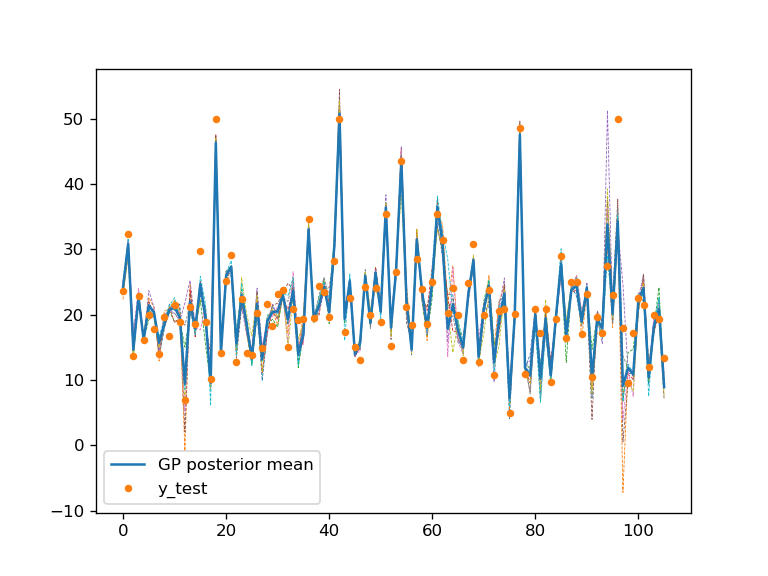

In [30]:
posterior_y_test = model.posterior_samples_f(X_test, full_cov=True)
mean_y_test,_ = model.predict(X_test,full_cov=True)
%matplotlib notebook 

plt.plot(posterior_y_test,'--',lw=0.5)
plt.plot(mean_y_test,label='GP posterior mean')
plt.plot(y_test,'.',ms=7,label='y_test')
plt.legend()

In [33]:
print ("R2 score =" ,r2_score(y_test, mean_y_test))

R2 score = 0.8879525242680145


In [29]:
####################################
#2# SUM OF TWO DIFFERENT KERNELS ###

ker_rbf = GPy.kern.RBF(13)
ker_mat= GPy.kern.Matern32(13, ARD=True)
kernel_sum = ker_rbf + ker_mat
model_sum = GPy.models.GPRegression(X_train,y_train,kernel_sum)
model_sum.optimize(messages=True,max_f_eval = 1000)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s11  0001   4.103909e+04   2.158552e+08 
    02s14  0029   1.259216e+03   2.320959e+03 
    07s27  0119   1.049120e+03   1.460497e+00 
    21s68  0369   1.034212e+03   9.696901e-02 
    27s79  0477   1.033963e+03   2.353285e-03 
    48s77  0844   1.033227e+03   5.950265e-04 
Runtime:     48s77
Optimization status: Converged



<IPython.core.display.Javascript object>


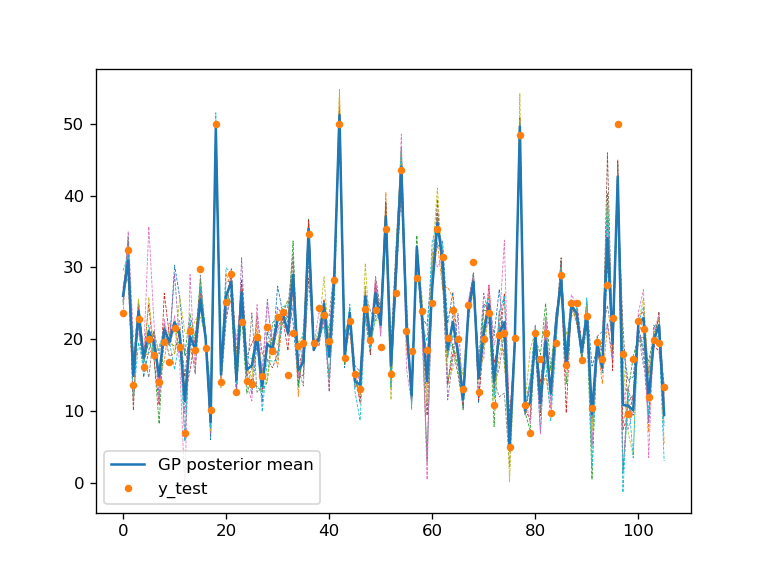

In [39]:
posterior_y_test2 = model_sum.posterior_samples_f(X_test, full_cov=True)
mean_y_test2,_ = model_sum.predict(X_test, full_cov=True)

%matplotlib notebook 

plt.plot(posterior_y_test2,'--',lw=0.5)
plt.plot(mean_y_test2,label='GP posterior mean')
plt.plot(y_test,'.',ms=7,label='y_test')
plt.legend()

In [40]:
print ("R2 score =" ,r2_score(y_test, mean_y_test2))

R2 score = 0.902799677727913


<IPython.core.display.Javascript object>


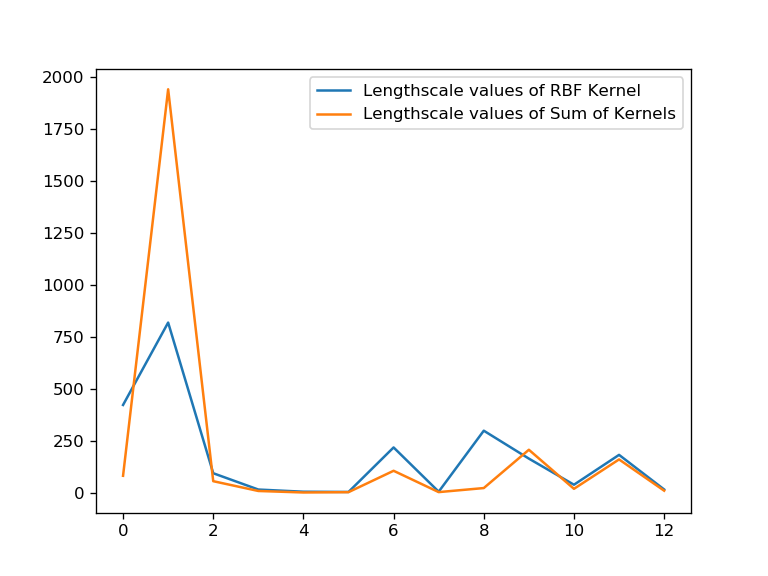

In [34]:
#Plots with 2 kernels
%matplotlib notebook 
p = ker.lengthscale.values
p_add = kernel_sum.Mat32.lengthscale.values
plt.figure()
plt.plot(p, label="Lengthscale values of RBF Kernel")
plt.plot(p_add, label="Lengthscale values of Sum of Kernels")
plt.legend()
plt.show()

**I used sum of 2 different kernels (one single, one sum of kernels). Comparing the R2 scores, they perform very similar (sum of kernels worked little better).**
 
**According to the plot, order of the variables according to the importance does not change with these 2 kernels.**

### Sparse GP implementation (optional)

Try to implement an sparse version of the GP regressor, optimized to find a set of **inducing points** that the GP relies on to do the prediction. Measure the test error prediction for 20, 40, and 100 inducing points.

In [44]:
for i in (20,40,100):
    m = GPy.models.SparseGPRegression(X_train, y_train, num_inducing=i)
    m.optimize('bfgs')
    posteriorYtestS = m.posterior_samples_f(X_test)
    mean_y_test_sparse,_ = m.predict(X_test)
    print ('For {} inducing points R2 score is {}'.format(i, r2_score(y_test, mean_y_test_sparse))) 

For 20 inducing points R2 score is -6.28895766512741


 C:\Users\alper\Anaconda3\lib\site-packages\GPy\core\gp.py:590: RuntimeWarning:covariance is not positive-semidefinite.


For 40 inducing points R2 score is 0.7434637235764467
For 100 inducing points R2 score is 0.7793097342701191


**Each time I increase the *inducing points*, obtained mae score decreased. Training with more data points improved the model performance, and at the end best model is with 100 inducing points**